In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mapper import Mapper

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
mapper = Mapper()

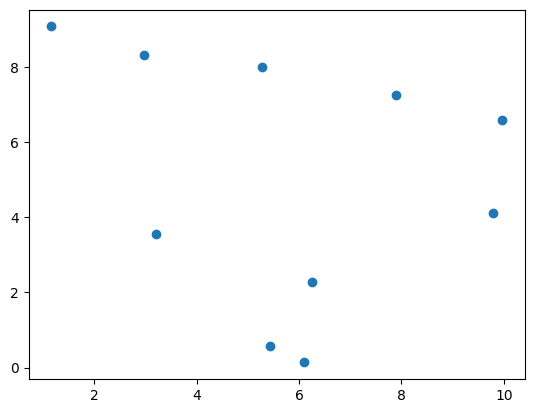

In [3]:
num_landmarks = 10
num_timesteps = 10
dets_per_timestep = 7
environment = np.random.random((num_landmarks, 2)) * 10

plt.scatter(environment[:,0], environment[:,1])

In [4]:
for i in range(100):
    zs = environment[np.random.choice(environment.shape[0], size=dets_per_timestep, replace=False), :].tolist()
    Rs = [np.eye(2)*.1 for z in zs]
    zs = [np.array(z).reshape((2,1)) + np.random.multivariate_normal(np.zeros(2), R).reshape((2,1)) for z, R in zip(zs, Rs)]

    mapper.update(zs, Rs)

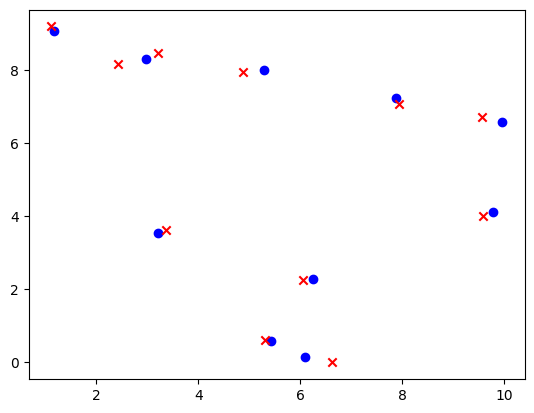

In [5]:
plt.scatter(environment[:,0], environment[:,1], color='blue', marker='o')
plt.scatter(mapper.map_as_array()[:,0], mapper.map_as_array()[:,1], color='red', marker='x')
